In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns
import datetime, warnings
import sqlite3
import glob

In [2]:
path = r'C:\Users\Ryan Lo\OneDrive\Documents\Projects\Yammer_Analysis\datasets' # use your path
all_files = glob.glob(path + "/*.csv")

csvs = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    csvs.append(df)


In [3]:
emails_tbl = """ CREATE TABLE IF NOT EXISTS emails (
                    user_id INTEGER,
                    occurred_at DATETIME NOT NULL,
                    action TEXT,
                    user_type INTEGER,
                    PRIMARY KEY (user_id, occurred_at)
                ); """

events_tbl = """CREATE TABLE IF NOT EXISTS events (
                    user_id INTEGER PRIMARY KEY,
                    occured_at DATETIME NOT NULL,
                    event_type TEXT,
                    event_name TEXT,
                    location TEXT,
                    device TEXT,
                    user_type INTEGER
                );"""

experiments_tbl = """CREATE TABLE IF NOT EXISTS experiments (
                    user_id INTEGER PRIMARY KEY,
                    occured_at DATETIME NOT NULL,
                    experiment TEXT,
                    experiment_group TEXT,
                    location TEXT,
                    device TEXT,
                    user_type INTEGER
                );"""

users_tbl = """CREATE TABLE IF NOT EXISTS users (
                    user_id INTEGER PRIMARY KEY,
                    created_at DATETIME NOT NULL,
                    company_id INTEGER,
                    language TEXT,
                    activated_at DATETIME,
                    state TEXT
                );"""

queries_list = [emails_tbl, events_tbl, experiments_tbl, users_tbl]

In [4]:
def create_table(conn, create_table_sql):
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)

In [5]:
table_names = ["emails", "events", "experiments", "users"]
conn = sqlite3.connect('yammer.db')

for queries in queries_list:
    create_table(conn, queries)
    
for count, csv in enumerate(csvs):
    conn.execute("DROP TABLE IF EXISTS {};".format(table_names[count]))
    csv.to_sql(table_names[count], conn)

In [6]:
q = '''
SELECT *
FROM events;
'''

pd.read_sql(q,conn)

,index,user_id,occurred_at,event_type,event_name,location,device,user_type
0,0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
1,1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0
2,2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0
3,3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0
4,4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0
...,...,...,...,...,...,...,...,...
340827,340827,18815.0,2014-08-31 13:41:46,engagement,like_message,Ireland,dell inspiron notebook,2.0
340828,340828,18815.0,2014-08-31 13:42:11,engagement,home_page,Ireland,dell inspiron notebook,2.0
340829,340829,18815.0,2014-08-31 13:42:43,engagement,send_message,Ireland,dell inspiron notebook,2.0
340830,340830,18815.0,2014-08-31 13:43:07,engagement,home_page,Ireland,dell inspiron notebook,2.0


## Section 1 - Investigating a Drop in User Engagement

Possible reasons for decrease in user engagment
- broken function (device specific, feature specific)
- competitors taking users
- holidays
- locational
- traffic anomalies in the past
- past highs in engagement can be due to marketing campaigns that artificially pushes engagement
- lack of retention from older users

In [7]:
q = '''
SELECT created_at, 
strftime('%d', created_at) as Day, 
strftime('%m', created_at) as Month, 
COUNT(CASE WHEN state = 'active' THEN user_id ELSE NULL END) as Activated_Users,
COUNT(user_id) as All_Users
FROM users
WHERE strftime('%Y', created_at) > '2013'
GROUP BY Month, Day
ORDER BY created_at
;
''' 
user_activity = pd.read_sql(q,conn)
user_activity

,created_at,Day,Month,Activated_Users,All_Users
0,2014-01-01 16:59:00,01,01,16,35
1,2014-01-02 20:16:21,02,01,35,54
2,2014-01-03 08:23:17,03,01,25,45
3,2014-01-04 12:10:53,04,01,7,11
4,2014-01-05 17:26:10,05,01,8,11
...,...,...,...,...,...
238,2014-08-27 08:00:23,27,08,48,90
239,2014-08-28 15:05:55,28,08,50,95
240,2014-08-29 15:18:44,29,08,45,97
241,2014-08-30 15:34:34,30,08,12,26


(array([ -9.,  -2.,   5.,  12.,  19.,  26.,  33.,  40.,  47.,  54.,  61.,
         68.,  75.,  82.,  89.,  96., 103., 110., 117., 124., 131., 138.,
        145., 152., 159., 166., 173., 180., 187., 194., 201., 208., 215.,
        222., 229., 236., 243., 250.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

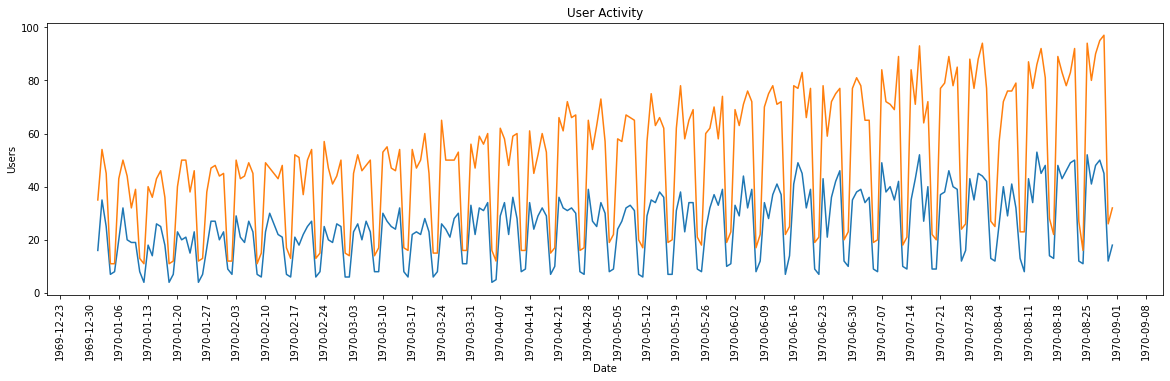

In [8]:
#Graph
warnings.filterwarnings('ignore')
fig, ax = plt.subplots(figsize=(20,5))
sns.lineplot(user_activity.index, user_activity.Activated_Users, palette="Purples_r")
sns.lineplot(user_activity.index, user_activity.All_Users, palette="Red")
plt.ylabel("Users")
plt.xlabel("Date")
plt.title("User Activity")
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday = 1))
# specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d')) 
# (optional) rotate by 90° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)
plt.xticks(rotation=90)

In [9]:
q = '''
SELECT DISTINCT event_name
FROM events
;
''' 
pd.read_sql(q,conn)

,event_name
0,login
1,home_page
2,like_message
3,view_inbox
4,search_run
5,send_message
6,search_autocomplete
7,search_click_result_10
8,create_user
9,enter_email


In [11]:
q = '''
SELECT
strftime('%d', occurred_at) as Day, 
strftime('%m', occurred_at) as Month,
COUNT(CASE WHEN event_name = 'login' THEN event_name ELSE NULL END) as Login_count,
COUNT(CASE WHEN event_name = 'home_page' THEN event_name ELSE NULL END) as Home_page_count,
COUNT(CASE WHEN event_name = 'view_inbox' THEN event_name ELSE NULL END) as View_inbox_count,
COUNT(CASE WHEN event_name = 'like_message' THEN event_name ELSE NULL END) as Like_message_count,
COUNT(CASE WHEN event_name = 'send_message' THEN event_name ELSE NULL END) as Send_message_count,
COUNT(CASE WHEN event_name LIKE 'search_click_result_%' THEN event_name ELSE NULL END) as click_count
FROM events
GROUP BY MONTH, DAY
;
''' 
event_action = pd.read_sql(q,conn)
event_action

,Day,Month,Login_count,Home_page_count,View_inbox_count,Like_message_count,Send_message_count,click_count
0,01,05,333,832,472,539,284,135
1,02,05,408,1165,682,754,416,119
2,03,05,146,344,222,227,126,81
3,04,05,80,205,134,137,78,8
4,05,05,286,736,434,499,297,96
...,...,...,...,...,...,...,...,...
118,27,08,327,764,481,443,266,68
119,28,08,352,802,477,501,280,93
120,29,08,445,1031,618,612,340,80
121,30,08,177,426,258,255,152,29


Text(0.5, 1.0, 'User Activity')

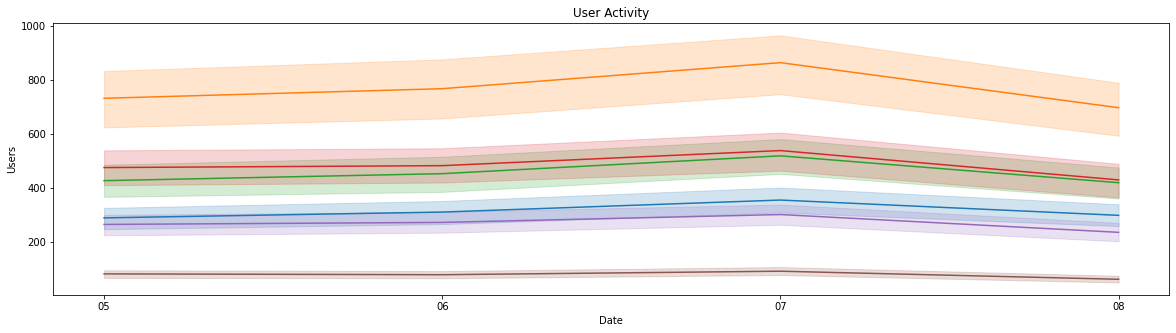

In [14]:
#Graph
plt.subplots(figsize=(20,5))
sns.lineplot(event_action.Month, event_action.Login_count)
sns.lineplot(event_action.Month, event_action.Home_page_count)
sns.lineplot(event_action.Month, event_action.View_inbox_count)
sns.lineplot(event_action.Month, event_action.Like_message_count)
sns.lineplot(event_action.Month, event_action.Send_message_count)
sns.lineplot(event_action.Month, event_action.click_count)
plt.ylabel("Users")
plt.xlabel("Date")
plt.title("User Activity")

In [15]:
q = '''
SELECT DISTINCT device
FROM events
;
''' 
unique_devices = pd.read_sql(q,conn)

In [16]:
q = '''
SELECT
CASE WHEN device in ('iphone 5','iphone 4s','iphone 5s','nexus 5','samsung galaxy s4','htc one','nokia lumia 635','samsung galaxy note','amazon fire phone') THEN 'mobile' 
WHEN device in ('windows surface','kindle fire','ipad mini','samsumg galaxy tablet','ipad air','nexus 7','nexus 10') THEN 'Tablet'
WHEN device in ('dell inspiron notebook','macbook air','macbook pro','lenovo thinkpad','acer aspire notebook','asus chromebook','acer aspire desktop','mac mini','hp pavilion desktop','dell inspiron desktop') THEN 'Desktop' END AS device_type,
SUM(engagement_stats.July_Engagement) As July_Engagement,
SUM(engagement_stats.August_Engagement) As August_Engagement,
(SUM(engagement_stats.July_Engagement) - SUM(engagement_stats.August_Engagement))*100.0 / SUM(engagement_stats.July_Engagement) As      Percentage_Change
FROM (SELECT
device,
COUNT(DISTINCT(CASE WHEN strftime('%m', occurred_at) = '07' THEN user_id ELSE NULL END)) as July_Engagement,
COUNT(DISTINCT(CASE WHEN strftime('%m', occurred_at) = '08' THEN user_id ELSE NULL END)) as August_Engagement
FROM events
GROUP BY device) As engagement_stats
GROUP BY device_type
;
''' 
pd.read_sql(q,conn)

,device_type,July_Engagement,August_Engagement,Percentage_Change
0,Desktop,3394,3369,0.736594
1,Tablet,908,687,24.339207
2,mobile,2129,1624,23.720056


In [17]:
q = '''
SELECT users.user_id,
COUNT(event_name) as Login_count,
users.activated_at,
strftime('%j', users.activated_at) as Account_Activation_Day,
strftime('%j', events.occurred_at) as Login_Day,
strftime('%j', '2014-09-01 00:00:00') - strftime('%j', users.activated_at) as user_age 
FROM users
INNER JOIN events ON users.user_id  = events.user_id
AND events.event_type = 'engagement'
AND events.event_name = 'login'
GROUP BY users.user_id
;
''' 
pd.read_sql(q,conn)

,user_id,Login_count,activated_at,Account_Activation_Day,Login_Day,user_age
0,4.0,16,2013-01-01 14:39:05,001,133,243
1,8.0,9,2013-01-01 04:40:10,001,122,243
2,11.0,12,2013-01-01 08:09:17,001,168,243
3,17.0,5,2013-01-02 10:57:58,002,211,242
4,19.0,7,2013-01-02 09:55:34,002,155,242
...,...,...,...,...,...,...
6137,19056.0,1,2014-08-31 16:36:56,243,243,1
6138,19059.0,1,2014-08-31 19:53:43,243,243,1
6139,19060.0,1,2014-08-31 12:20:48,243,243,1
6140,19061.0,1,2014-08-31 13:22:50,243,243,1


In [18]:
q = '''
WITH regions AS(
SELECT user_id,
CASE
    WHEN location IN ('Indonesia', 'Korea', 'Singapore', 'Israel',   'Malaysia', 'Hong Kong', 'Saudi Arabia', 'Philippines', 'Turkey', 'United Arab Emirates', 'Taiwan', 'Thailand', 'India', 'Iran', 'Japan', 'Iraq', 'Russia', 'Pakistan') 
    THEN 'Asia'
    WHEN location IN ('Venezuela', 'Colombia', 'Argentina', 'Chile', 'Brazil') 
    THEN 'South_America'
    WHEN location IN ('Sweden', 'Ireland', 'Portugal', 'Finland', 'France', 'Netherlands', 'Spain', 'Belgium', 'Italy', 'United Kingdom', 'Germany', 'Greece', 'Denmark', 'Switzerland', 'Norway', 'Austria', 'Poland') 
    THEN 'Europe'
    WHEN location IN ('United States', 'Canada', 'Mexico') 
    THEN 'North_America'
    WHEN location IN ('Nigeria', 'Egypt', 'South Africa') 
    THEN 'Africa'
    WHEN location IN ('Australia') 
    THEN 'Oceania'
    ELSE null end as regions,
COUNT(*)
FROM events
WHERE event_type = 'engagement'
GROUP BY 1, 2 
)

SELECT  strftime('%W', events.occurred_at) AS start_week_date, regions,
      COUNT(DISTINCT events.user_id) AS num
FROM events
JOIN regions
ON events.user_id = regions.user_id
GROUP BY 1, 2
'''
pd.read_sql(q,conn)

,start_week_date,regions,num
0,17,Africa,11
1,17,Asia,178
2,17,Europe,210
3,17,North_America,245
4,17,Oceania,17
...,...,...,...
103,34,Asia,307
104,34,Europe,365
105,34,North_America,405
106,34,Oceania,25


In [ ]:
#Graph

## Section 2 - Understanding Search Functionality

How might you (quantitatively) understand the general quality of an individual user's search experience?

- How often the search function is used
- How often the autocomplete is logged
- Is the first search result selected. Relevant posts should appear higher. Ranking algorithm is working efficently if top return result is selected
- Too many clickthroughs (search process too long) can result in poor experience


- search_autocomplete: This is logged when a user clicks on a search option from autocomplete
- search_run: This is logged when a user runs a search and sees the search results page.
- search_click_X: This is logged when a user clicks on a search result. X, which ranges from 1 to 10, describes which search result was clicked


In [23]:
q = '''
SELECT
occurred_at,
strftime('%W', occurred_at) as week_of_year,
COUNT(DISTINCT CASE WHEN event_name = 'search_run' THEN user_id ELSE NULL END) as search_run,
COUNT(DISTINCT CASE WHEN event_name = 'search_autocomplete' THEN user_id ELSE NULL END) as search_autocomplete
FROM events
GROUP BY week_of_year
;
''' 
user_activity = pd.read_sql(q,conn)
user_activity

,occurred_at,week_of_year,search_run,search_autocomplete
0,2014-05-02 11:02:39,17,86,200
1,2014-05-09 17:52:45,18,167,372
2,2014-05-15 13:52:59,19,149,402
3,2014-05-20 07:29:34,20,168,412
4,2014-05-28 14:10:56,21,161,390
5,2014-06-03 15:12:16,22,168,414
6,2014-06-09 07:06:11,23,177,422
7,2014-06-20 14:31:18,24,165,445
8,2014-06-27 18:40:23,25,165,449
9,2014-07-04 10:33:32,26,175,449


Text(0.5, 1.0, 'User Activity')

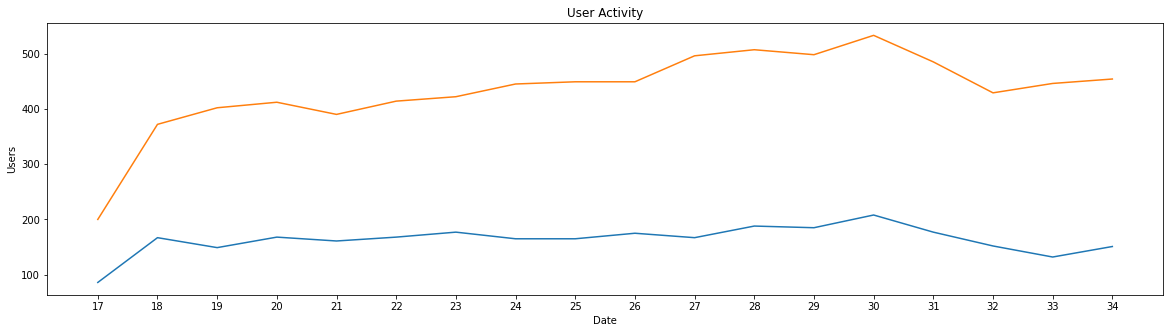

In [24]:
fig, ax = plt.subplots(figsize=(20,5))
sns.lineplot(user_activity.week_of_year, user_activity.search_run, palette="Purples_r")
sns.lineplot(user_activity.week_of_year, user_activity.search_autocomplete, palette="Red")
plt.ylabel("Users")
plt.xlabel("Date")
plt.title("User Activity")

In [26]:
q = '''
SELECT
occurred_at,
strftime('%W', occurred_at) as week_of_year,
COUNT(DISTINCT CASE WHEN event_name = 'search_run' THEN user_id ELSE NULL END)*100.0 / COUNT(DISTINCT user_id) as search_run,
COUNT(DISTINCT CASE WHEN event_name = 'search_autocomplete' THEN user_id ELSE NULL END)*100.0 / COUNT(DISTINCT user_id) as search_autocomplete
FROM events
GROUP BY week_of_year
;
''' 
user_activity = pd.read_sql(q,conn)
user_activity

,occurred_at,week_of_year,search_run,search_autocomplete
0,2014-05-02 11:02:39,17,10.872314,25.284450
1,2014-05-09 17:52:45,18,13.424437,29.903537
2,2014-05-15 13:52:59,19,11.732283,31.653543
3,2014-05-20 07:29:34,20,12.527964,30.723341
4,2014-05-28 14:10:56,21,12.451663,30.162413
5,2014-06-03 15:12:16,22,12.298682,30.307467
6,2014-06-09 07:06:11,23,12.343096,29.428173
7,2014-06-20 14:31:18,24,11.285910,30.437756
8,2014-06-27 18:40:23,25,11.434511,31.115731
9,2014-07-04 10:33:32,26,11.848341,30.399458


Text(0.5, 1.0, 'User Activity')

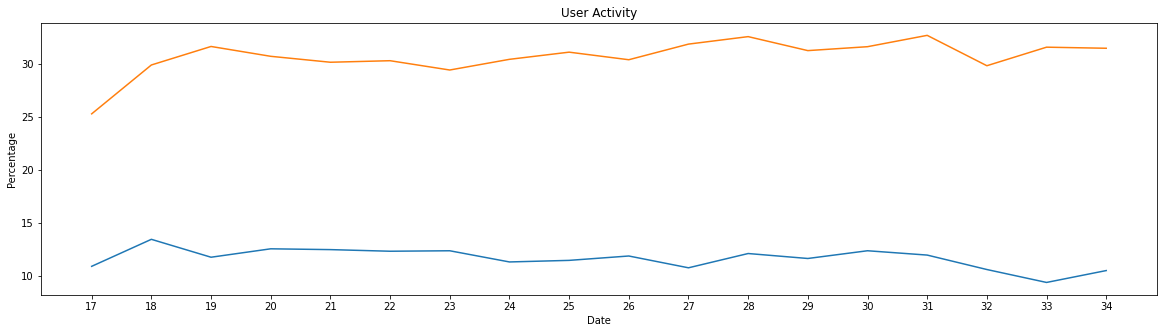

In [28]:
fig, ax = plt.subplots(figsize=(20,5))
sns.lineplot(user_activity.week_of_year, user_activity.search_run, palette="Purples_r")
sns.lineplot(user_activity.week_of_year, user_activity.search_autocomplete, palette="Red")
plt.ylabel("Percentage")
plt.xlabel("Date")
plt.title("User Activity")

In [ ]:
q = '''
SELECT
user_id,
COUNT(new_session)
FROM (SELECT
user_id,
event_name,
LAG(event_name, 1) OVER (ORDER BY user_id) AS lag_event,
occurred_at,
LAG(occurred_at, 1) OVER (ORDER BY user_id) AS lag_time,
CASE WHEN (strftime('%s', occurred_at) - strftime('%s', LAG(occurred_at, 1) OVER (ORDER BY user_id))) / 60 > 10 THEN 'TRUE' ELSE 'FALSE' END AS new_session
FROM events
ORDER BY user_id) As s
GROUP BY user_id, s.new_session
;
''' 
pd.read_sql(q,conn)
#COUNT(CASE WHEN event_name = 'search_run' AND Sessions.Diff = 'NEW SESS' THEN Diff ELSE NULL END) As Count
# 1Session|2Session|3Session

In [29]:
q = '''
WITH cte AS (
SELECT
t.user_id,
t.event_name,
t.occurred_at,
t.lag_time,
t.Diff,
SUM(t.Diff) OVER (PARTITION BY t.user_id ORDER BY t.occurred_at) AS session_id
FROM (SELECT
user_id,
event_name,
LAG(event_name, 1) OVER (PARTITION BY user_id ORDER BY user_id) AS lag_event,
occurred_at,
LAG(occurred_at, 1, 0) OVER (PARTITION BY user_id ORDER BY user_id) AS lag_time,
CASE WHEN (strftime('%s', occurred_at) - strftime('%s', LAG(occurred_at, 1, 0) OVER (PARTITION BY user_id ORDER BY user_id, occurred_at))) / 60 > 10 THEN 1 ELSE 0 END AS Diff
FROM events
ORDER BY user_id) t)

SELECT
session_id,
COUNT(CASE WHEN event_name = 'search_run' THEN event_name ELSE NULL END) as search_run_count
FROM cte
GROUP BY session_id
;
''' 

run_count = pd.read_sql(q,conn).head(10)
run_count

,session_id,search_run_count
0,1,2158
1,2,1776
2,3,1486
3,4,1321
4,5,955
5,6,746
6,7,647
7,8,544
8,9,472
9,10,434


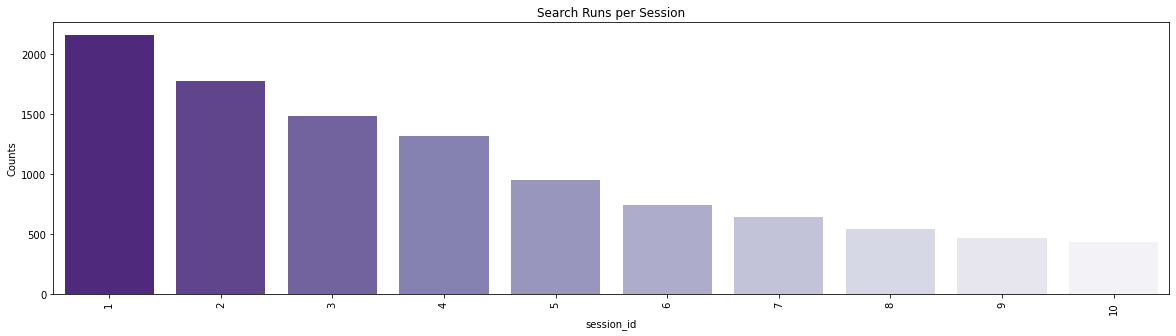

In [30]:
plt.figure(figsize=(20,5))
sns.barplot(run_count.session_id, run_count.search_run_count, palette="Purples_r")
plt.ylabel("Counts")
plt.title("Search Runs per Session");
plt.xticks(rotation=90);

In [31]:
q = '''
WITH cte AS (
SELECT
t.user_id,
t.event_name,
t.occurred_at,
t.lag_time,
t.Diff,
SUM(t.Diff) OVER (PARTITION BY t.user_id ORDER BY t.occurred_at) AS session_id
FROM (SELECT
user_id,
event_name,
LAG(event_name, 1) OVER (PARTITION BY user_id ORDER BY user_id) AS lag_event,
occurred_at,
LAG(occurred_at, 1, 0) OVER (PARTITION BY user_id ORDER BY user_id) AS lag_time,
CASE WHEN (strftime('%s', occurred_at) - strftime('%s', LAG(occurred_at, 1, 0) OVER (PARTITION BY user_id ORDER BY user_id, occurred_at))) / 60 >= 10 THEN 1 ELSE 0 END AS Diff
FROM events
ORDER BY user_id) t)

SELECT
session_id,
COUNT(CASE WHEN event_name = 'search_autocomplete' THEN event_name ELSE NULL END) as search_autocomplete_count
FROM cte
GROUP BY session_id
;
''' 

autocomplete_count = pd.read_sql(q,conn).head(10)
autocomplete_count

,session_id,search_autocomplete_count
0,1,2879
1,2,2503
2,3,2054
3,4,1631
4,5,1371
5,6,1111
6,7,1054
7,8,747
8,9,677
9,10,525


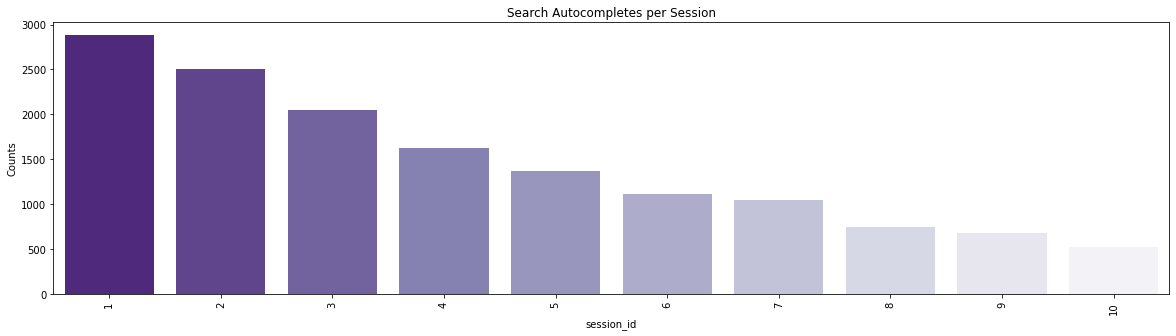

In [32]:
plt.figure(figsize=(20,5))
sns.barplot(autocomplete_count.session_id, autocomplete_count.search_autocomplete_count, palette="Purples_r")
plt.ylabel("Counts")
plt.title("Search Autocompletes per Session");
plt.xticks(rotation=90);

In [ ]:
q = '''
WITH cte AS (
SELECT
t.user_id,
t.event_name,
t.occurred_at,
t.lag_time,
t.Diff,
SUM(t.Diff) OVER (PARTITION BY t.user_id ORDER BY t.occurred_at) AS session_id
FROM (SELECT
user_id,
event_name,
LAG(event_name, 1) OVER (PARTITION BY user_id ORDER BY user_id) AS lag_event,
occurred_at,
LAG(occurred_at, 1, 0) OVER (PARTITION BY user_id ORDER BY user_id) AS lag_time,
CASE WHEN (strftime('%s', occurred_at) - strftime('%s', LAG(occurred_at, 1, 0) OVER (PARTITION BY user_id ORDER BY user_id, occurred_at))) / 60 >= 10 THEN 1 ELSE 0 END AS Diff
FROM events
ORDER BY user_id) t)

SELECT
session_id,
COUNT(CASE WHEN event_name LIKE '%search_click%' THEN event_name ELSE NULL END) as search_click_count
FROM cte
GROUP BY session_id
;
''' 

autocomplete_count = pd.read_sql(q,conn).head(10)
autocomplete_count

In [ ]:
q = '''
SELECT
event_name,
COUNT(user_id)
FROM events
WHERE event_name LIKE '%search_click%'
GROUP BY event_name
;
''' 

search_click = pd.read_sql(q,conn)
search_click
#search_click_results_2 is the highest